In [31]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [73]:
X,y=make_regression(n_samples=4, n_features=1,n_informative=1,n_targets=1,
                   noise=80,random_state=13)

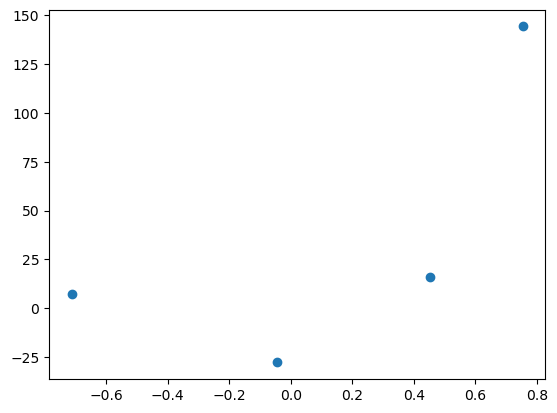

In [74]:
plt.scatter(X,y)

In [75]:
from sklearn.linear_model import LinearRegression

In [77]:
# Applying OLS
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [78]:
reg.coef_

array([78.35063668])

In [79]:
reg.intercept_

26.15963284313262

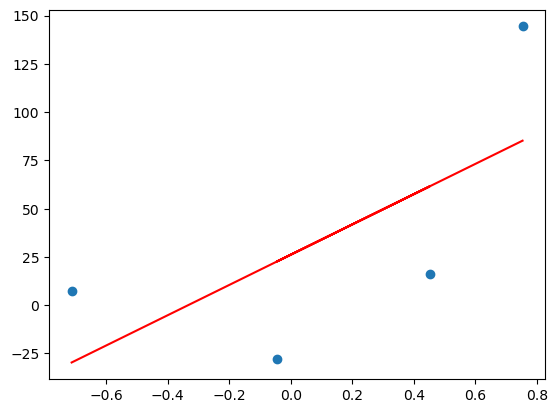

In [82]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),'r')

# APPLYING Gradient Descent:

In [86]:
#assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0

y_pred = (78.35*X) + 0

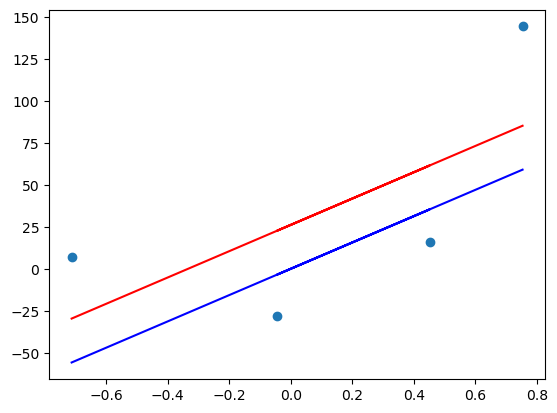

In [92]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),'r')
plt.plot(X,y_pred.reshape(4),'g')

In [101]:
#  slope = -2*sum(y-m*x-b)
# for b=0 & m=78.35
m=78.35
b=0

slope = -2*np.sum(y-m*X.flatten()+b)
slope

-209.27763408209216

In [119]:
lr=0.1
stepsize = lr*slope

In [124]:
bnew = b-stepsize
print(bnew)
y_pred2= 78.35*X+bnew

20.927763408209216


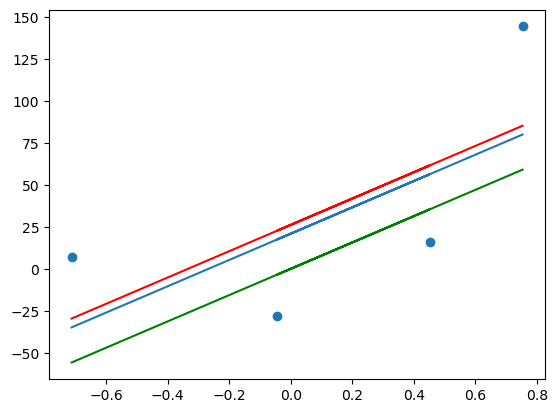

In [126]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),'r')
plt.plot(X,y_pred,'g')
plt.plot(X,y_pred2,'')

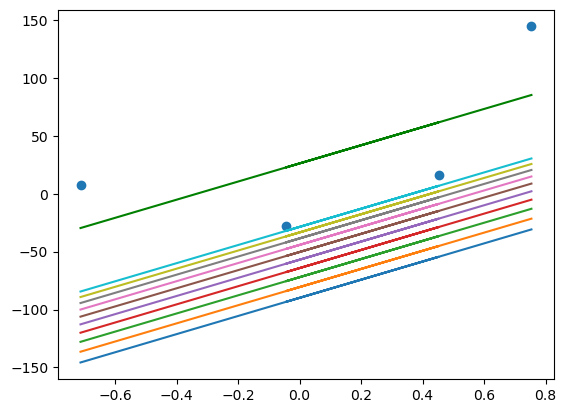

In [168]:
# puttig all the above in loop

b= -100
m=78.35
lr=.01
epoch=10

for i in range(epoch):
    slope = -2*np.sum(y-m*X.ravel()-b)
    b = b - (lr * slope)
    y_pred = m* X + b
    plt.plot(X,y_pred)
    plt.ion()
    
plt.plot(X,reg.predict(X),'g')
plt.scatter(X,y)

# Own GD regeressio

In [354]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [355]:
X,y= make_regression(n_samples=100,n_features=1,n_targets=1,n_informative=1,
                     noise=20,random_state=13)


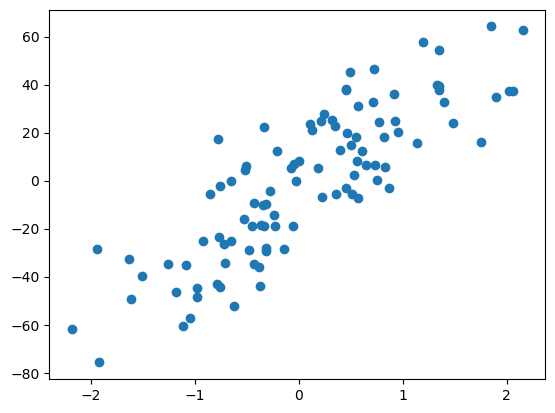

In [356]:
plt.scatter(X,y)

In [357]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [358]:
from sklearn.linear_model import LinearRegression

In [359]:
lr = LinearRegression()

In [360]:
lr.fit(X_train,y_train)
lr.coef_, lr.intercept_

(array([28.12597332]), -2.2710144261783816)

In [361]:
ypred1= lr.predict(X_test)

In [362]:
from sklearn.metrics import r2_score

In [363]:
r2_score(y_test,ypred1)

0.6345158782661013

In [364]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.6375011587464419

In [207]:
# My regressor

In [405]:
class GDreg:
    def __init__(self,lr,epo):
        self.m=100
        self.b=-120
        self.lR=lr
        self.epochs=epo
        
    def fit(self,X,y):
        
        for i in range(self.epochs):
                slope_b =-2* np.sum(y - (self.m*X.ravel()) - self.b) 
                slope_m =-2* np.sum((y - (self.m*X.ravel()-self.b))*X.ravel())
                self.b = self.b - self.lR*slope_b
                self.m = self.m - self.lR*slope_m
                
        print('m=',self.m,'b=',self.b)
    
    def predict(self,X):
        #return self.m*X + self.b
        return self.m * X + self.b
            

        

In [406]:
myGD = GDreg(0.001,50)

In [412]:
myGD.fit(X_train,y_train)

m= 27.884100615339587 b= -2.2587643562433053


In [413]:
ypred3= myGD.predict(X_test)

In [414]:
r2_score(y_test,ypred3)

0.6355386188925473

In [379]:
gd = GDRegressor(0.001,50)

In [380]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854
